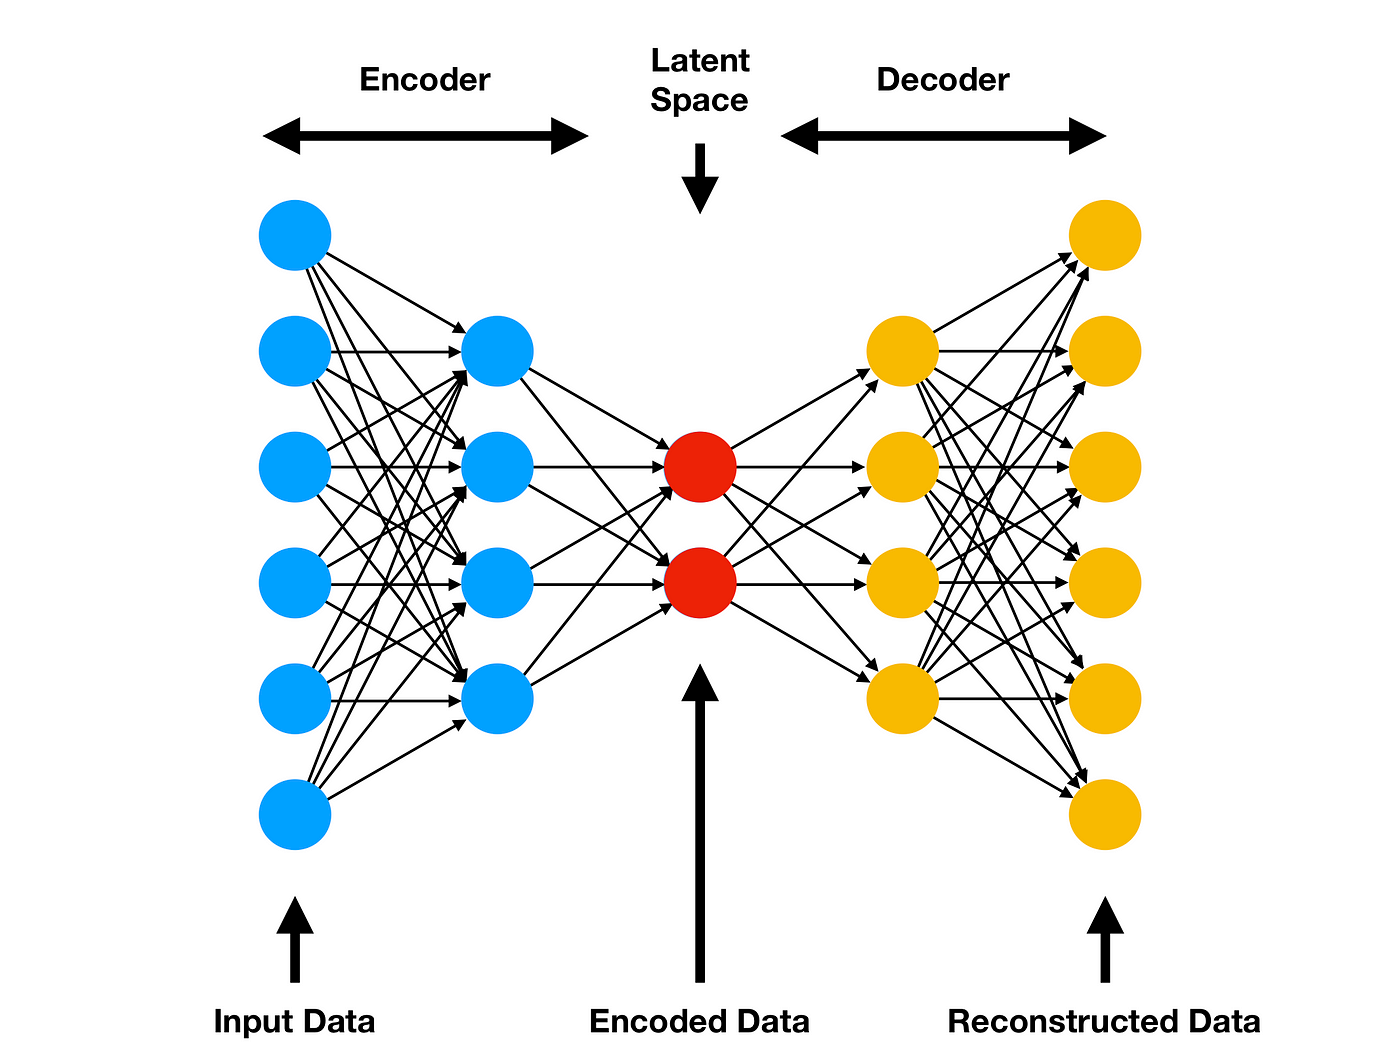

A **vanilla autoencoder**, in its simplest form, comprises just an encoder and a decoder without any additional complexities or other architectures. It can be seen as the baseline version of more complex autoencoders such as variational autoencoders or convolutional autoencoders.

Below is a concise representation of a vanilla autoencoder for the MNIST dataset using TensorFlow and Keras:

This is a basic representation of a vanilla autoencoder where the input data is compressed into a reduced dimensional space (encoded) and then reconstructed (decoded) back to its original form. The autoencoder learns to do this compression and decompression in a way that minimizes the difference between the original input and the reconstructed output.

11490434/11490434 [==============================] - 1s 0us/step
Epoch 1/50
235/235 [==============================] - 6s 20ms/step - loss: 0.2752 - val_loss: 0.1883
Epoch 2/50
235/235 [==============================] - 4s 18ms/step - loss: 0.1686 - val_loss: 0.1518
Epoch 3/50
235/235 [==============================] - 5s 23ms/step - loss: 0.1434 - val_loss: 0.1335
Epoch 4/50
235/235 [==============================] - 5s 20ms/step - loss: 0.1286 - val_loss: 0.1215
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1185 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1111 - val_loss: 0.1069
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1058 - val_loss: 0.1024
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.1021 - val_loss: 0.0992
Epoch 9/50
235/235 [==============================] - 2s 10ms/step - loss: 0.0994 - val_loss: 0.0968
Epoch 10/50
235/235 [=====

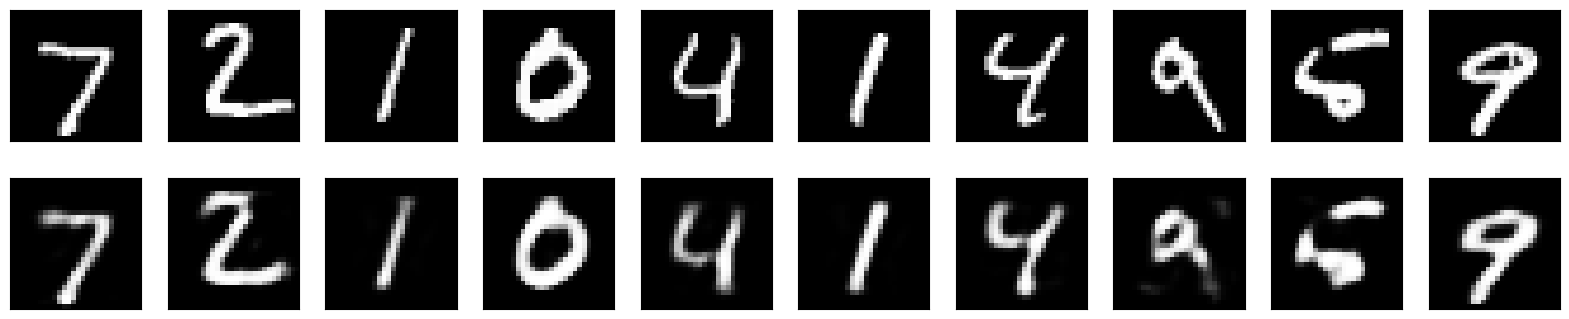

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Load and preprocess the data
(train_images, _), (test_images, _) = mnist.load_data()
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.
train_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

# Define the dimensions
input_dim = 784
encoding_dim = 32

# Input layer
input_img = Input(shape=(input_dim,))

# Encoder layer
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder layer
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Full autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(train_images, train_images,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(test_images, test_images))

# Predict (encode and decode) on the test set
decoded_imgs = autoencoder.predict(test_images)

# Visualization
n = 10  # number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
